In [249]:
import pandas as pd
from  skimage.io import imread, imshow
import pywt
import pywt.data
import matplotlib.pyplot as plt
import numpy as np
import csv as cvS
import os
from sklearn import svm                                                                                                                
import random
import pandas as pd
from sklearn.model_selection import train_test_split

Por ejemplo, el archivo
0070038, indica que es la imagen numero 38 de la especie 7. 

(185, 185, 3)

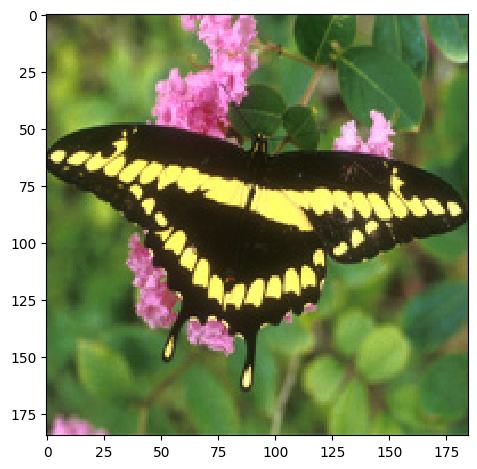

In [250]:

path = "../../../DB/dataset/"
imagen = path + '0070036.png'
picture = imread(imagen)
imshow(picture)
picture.shape

# Redimensionar el tamaño de todas las imagenes a un solo estandar (24x24)

In [251]:
import cv2
import os

def resize_image(image_path, new_resolution):
    # Carga la imagen
    image = cv2.imread(image_path)

    # Redimensiona la imagen a la nueva resolución
    resized_image = cv2.resize(image, new_resolution)

    return resized_image

# Ruta de la carpeta de entrada
input_folder = "../../../DB/dataset/"

# Ruta de la carpeta de salida para imágenes redimensionadas
output_folder = "../../../DB/dataset_redimention_48x48/"

# Nueva resolución deseada
new_resolution = (24, 24)

# Asegúrate de que la carpeta de salida exista, o créala si no existe
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Lista de nombres de archivos en la carpeta de entrada
nameFiles = os.listdir(input_folder)

# Itera sobre cada archivo en la carpeta de entrada
for image_name in nameFiles:
    # Ruta de la imagen de entrada
    input_image_path = os.path.join(input_folder, image_name)

    # Genera el nombre de archivo de salida
    output_image_path = os.path.join(output_folder, image_name)

    # Llama a la función para redimensionar y guardar la imagen
    resized_image = resize_image(input_image_path, new_resolution)

    # Guarda la imagen redimensionada en la carpeta de salida con el mismo nombre
    cv2.imwrite(output_image_path, resized_image)


# Organizar las especies de las mariposas por su codigo de imagen

In [252]:
pathList = [] # listas de rutas de las imagenes para clasificarlas ( 10 especies )
path = "../../../DB/dataset_redimention_48x48/"
nameFiles = os.listdir(path) # te da una lista de todas las rutas de las imagenes

clasificacion = [] # este es una matriz que tendra 10 listas ya que son 10 especies

# Creo la matriz vacia de tamaño 10 
for i in range(1,12):
    lista = [] 
    clasificacion.append(lista) 

#Clasifico las imagenes segun su index - tener en cuenta que la posicion 0 no hay nada
for image in nameFiles : 
    clasificacion[int(image[1:3])].append(image) 

print(clasificacion[10])

['0100003.png', '0100005.png', '0100006.png', '0100008.png', '0100009.png', '0100012.png', '0100016.png', '0100018.png', '0100019.png', '0100020.png', '0100022.png', '0100023.png', '0100024.png', '0100025.png', '0100028.png', '0100029.png', '0100030.png', '0100031.png', '0100034.png', '0100036.png', '0100037.png', '0100038.png', '0100039.png', '0100041.png', '0100042.png', '0100044.png', '0100045.png', '0100047.png', '0100050.png', '0100051.png', '0100054.png', '0100058.png', '0100067.png', '0100072.png', '0100077.png', '0100079.png', '0100082.png', '0100086.png', '0100089.png', '0100091.png', '0100092.png', '0100093.png', '0100096.png', '0100097.png', '0100099.png', '0100107.png', '0100110.png', '0100111.png', '0100113.png', '0100115.png', '0100119.png', '0100120.png', '0100122.png', '0100123.png', '0100124.png', '0100126.png', '0100128.png', '0100130.png', '0100132.png', '0100133.png', '0100134.png', '0100136.png', '0100137.png', '0100143.png', '0100145.png', '0100147.png', '0100148.

# Hacer Cortes a la Imgen ( hard wavelet)

In [253]:
def   Get_Feacture(picture, cortes):
  LL = picture
  for i in range(cortes):
     LL, (LH, HL, HH) = pywt.dwt2(LL, 'haar')
  return LL.flatten()

# Hacer cortes a toda una carpeta de imagenes

In [254]:
def Get_Feacture_file(rutaCarpeta, listaNombre, cortes):
    LL_list = []
    for code in listaNombre:
        ruta = rutaCarpeta + code
        picture = imread(ruta)
        features = Get_Feacture(picture, cortes)  # Ahora Get_Feacture devuelve una lista
        LL_list.append(features)
    return LL_list


# Almacenar los vectores caracteristicos en un archivo CVS

In [255]:
def Create_DataBase_CVS(nombreArchivo,LL_list,etiqueta):
    data = {}    

    for i in range(len(LL_list[0])):
        index = "C" + str(i+1)
        data[index] = []            
     
    for vector in LL_list:
        for j in range(len(vector)):
            index = "C" + str(j+1)
            #print(index)
            data[index].append(vector[j])       

    data["Etiqueta"] = etiqueta
    df = pd.DataFrame(data)
    df.to_csv(nombreArchivo, index=False) # index=False evita que se incluya el índice en el archivo CSV

In [256]:
path = "../../../DB/dataset_redimention_48x48/"
#os.mkdir("VC_Especies")
for i in range(1,11):    
    LL_list = Get_Feacture_file(path,clasificacion[i],2)
    Create_DataBase_CVS("VC_Especies/VC_Especie_" + str(i) + ".cvs",LL_list,i)   



# Combinar todos los archivos CVS a uno solo de manera al azar

In [257]:
# Especifica la carpeta que contiene los archivos CSV
path = 'VC_Especies/'

# Lista todos los archivos CSV en la carpeta
nameFiles = os.listdir(path)

# Crea una lista para almacenar todas las filas de los archivos CSV
all_rows = []

# Lee cada archivo CSV, guarda sus filas en la lista all_rows
for archivo_csv in nameFiles:
    ruta_completa = os.path.join(path, archivo_csv)
    df = pd.read_csv(ruta_completa)
    all_rows.extend(df.values.tolist())

# Mezcla todas las filas de manera aleatoria
random.shuffle(all_rows)

# Crea un DataFrame a partir de las filas mezcladas
resultado = pd.DataFrame(all_rows, columns=df.columns)

# Guarda el resultado en un nuevo archivo CSV
resultado.to_csv('Vectores_Caracteristicos_Mariposas.csv', index=False)


# Modelo Logistico



### Extraer Informacion del DataBase

In [258]:
dataset = pd.read_csv('Vectores_Caracteristicos_Mariposas.csv')

X = dataset[dataset.columns]
X.insert(0,"bias",1)
Y = dataset["Etiqueta"]

### Hipótesis
- Ecuación de la recta o Hiperplano
\begin{equation}
h(x_i) = w_0 + w_1x_i^1 +  w_2x_i^2 ... w_kx_i^k
\end{equation} \\

- Ecuación de la función sigmoidea (clasificador binario)
\begin{equation}
s(x_i) = \frac{1}{1 + e^{-h(x)}}
\end{equation}

In [259]:
def h(X, W):
    return np.dot(X, W.T)

def s(X, W):
    return 1 / (1 + np.exp(-h(X, W)))

### Loss Function (Cross-Entropy)

\begin{equation}
L = -\frac{1}{n}\sum_{i=0}^n(y_ilog(s(x_i)) + (1-y_i)log(1-s(x_i)))  
\end{equation} \\


In [260]:
def Loss(X,Y,W):
    especial = 0.000001
    loss = -np.mean(Y * np.log(s(X, W) + especial) + (1 - Y) * np.log(1 - s(X, W) + especial))
    return loss

### Derivatives

\begin{equation}
\frac{\partial L}{\partial w_j} = \frac{1}{n}\sum_{i=0}^n(y_i - s(x_i))(-x_i^j)
\end{equation} \\

Nota:  $x_i^j$ se refiere a la característica $j-esima$ del objeto $i-esimo$ de entrenamiento


In [261]:
def Derivatives(X,Y,W):
    n = len(X)

    dw = np.dot(X.T, (s(X, W) - Y)) / n
    
    return dw    

### Change parameters

\begin{equation}
 w_j = w_i - \alpha\frac{\partial L}{\partial w_j}
\end{equation}

In [262]:
def ChangeParameters(W , Derivatives, alpha):
    return  W - alpha * Derivatives    

### Trainning

In [263]:
def train_one_vs_all(X, Y, class_label, epochs, alpha):
    binary_labels = (Y == class_label).astype(int)
    W = np.random.random(X.shape[1])
    loss = []
    for i in range(epochs):
        DW = Derivatives(X, binary_labels, W)
        W = ChangeParameters(W, DW, alpha)
        L = Loss(X, binary_labels, W)
        loss.append(L)

        """"
        if (i % 1000) == 0:
            print(f"Class {class_label+1} - Loss value error: {L}")
        """
    return W, loss

def train(X, Y, num_classes, epochs, alpha):
    train_weights = {}
    train_losses = {}
    
    for class_label in range(num_classes):
        W, loss = train_one_vs_all(X, Y, class_label, epochs, alpha)
        train_weights[class_label] = W
        train_losses[class_label] = loss
    
    return train_weights, train_losses

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def kfold_cross_validation(X, Y, num_classes, epochs, alpha, num_folds=5):
    kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    best_precision = 0.0
    best_recall = 0.0
    best_f1 = 0.0
    best_accuracy = 0.0
    best_weights = None
    best_losses = None
    
    for train_index, val_index in kf.split(X, Y):  # Asegura que Y se pase como argumento para estratificación
        X_train, X_val = X[train_index], X[val_index]
        Y_train, Y_val = Y[train_index], Y[val_index]
        
        train_weights, train_losses = train(X_train, Y_train, num_classes, epochs, alpha)
        Y_pred = test(X_val, train_weights)
        
        precision = precision_score(Y_val, Y_pred, average='macro', zero_division=0)
        recall = recall_score(Y_val, Y_pred, average='macro', zero_division=0)
        f1 = f1_score(Y_val, Y_pred, average='macro', zero_division=0)
        accuracy = accuracy_score(Y_val, Y_pred)
        
        if accuracy > best_accuracy:
            best_precision = precision
            best_recall = recall
            best_f1 = f1
            best_accuracy = accuracy
            best_weights = train_weights
            best_losses = train_losses
    
    # Muestra el mejor gráfico
    plt.figure()
    for class_label, loss in best_losses.items():
        plt.plot(range(epochs), loss, label=f"Class {class_label}")
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.title('Pérdida vs. Épocas (Mejor Modelo)')
    plt.legend()
    plt.show()
    
    return best_precision, best_recall, best_f1, best_accuracy, best_weights



### Testing


In [265]:
def test(X, class_weights):
    probabilities = np.zeros((X.shape[0], len(class_weights)))
    for class_label, weight in class_weights.items():
        probabilities[:, class_label] = s(X, weight)
    return np.argmax(probabilities, axis=1)

### Database

In [266]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos
dataset = pd.read_csv('Vectores_Caracteristicos_Mariposas.csv')

X = dataset[dataset.columns].values
Y = dataset["Etiqueta"].values

# Dividir los datos en conjuntos de entrenamiento, validación y prueba (70% entrenamiento, 15% validación, 15% prueba)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Agregar una columna de sesgo a los datos normalizados
X_train = np.insert(X_train, 0, 1, axis=1)
X_val = np.insert(X_val, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)


### Grafica

- 1000 Epochs

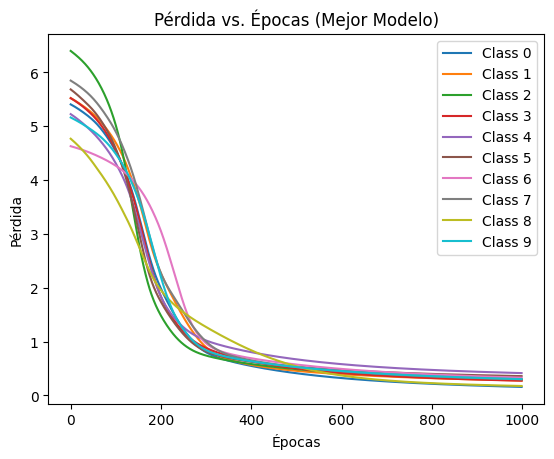

Mejor resultado:
   Precision    Recall  F1-Score  Accuracy  Epochs  Learning Rate  Num Folds
0   0.312825  0.350649  0.292418   0.37931    1000           0.01         10


In [267]:
# Especifica tus hiperparámetros
num_classes = 10
epochs = 1000
alpha = 0.01
num_folds = 10  # Cambia el número de folds según tus necesidades

# Realiza la validación cruzada y muestra solo el mejor gráfico junto con los mejores resultados
best_precision, best_recall, best_f1, best_accuracy, best_weights = kfold_cross_validation(X_train, Y_train, num_classes, epochs, alpha, num_folds)

# Especifica tus hiperparámetros en un diccionario
hyperparameters = {'Epochs': epochs, 'Learning Rate': alpha, 'Num Folds': num_folds}

# Muestra los mejores resultados junto con los hiperparámetros
results = pd.DataFrame({
    'Precision': [best_precision],
    'Recall': [best_recall],
    'F1-Score': [best_f1],
    'Accuracy': [best_accuracy],
    **hyperparameters  # Agrega aquí tus hiperparámetros
})

print("Mejor resultado:")
print(results)



- 10000

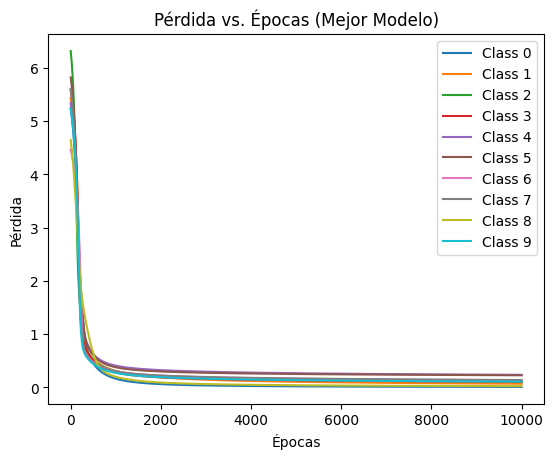

Mejor resultado:
   Precision    Recall  F1-Score  Accuracy  Epochs  Learning Rate  Num Folds
0   0.526587  0.567857  0.541742  0.568966   10000           0.01         10


In [268]:
# Especifica tus hiperparámetros
num_classes = 10
epochs = 10000
alpha = 0.01
num_folds = 10  # Cambia el número de folds según tus necesidades

# Realiza la validación cruzada y muestra solo el mejor gráfico junto con los mejores resultados
best_precision, best_recall, best_f1, best_accuracy, best_weights = kfold_cross_validation(X_train, Y_train, num_classes, epochs, alpha, num_folds)

# Especifica tus hiperparámetros en un diccionario
hyperparameters = {'Epochs': epochs, 'Learning Rate': alpha, 'Num Folds': num_folds}

# Muestra los mejores resultados junto con los hiperparámetros
results = pd.DataFrame({
    'Precision': [best_precision],
    'Recall': [best_recall],
    'F1-Score': [best_f1],
    'Accuracy': [best_accuracy],
    **hyperparameters  # Agrega aquí tus hiperparámetros
})

print("Mejor resultado:")
print(results)

- 50000

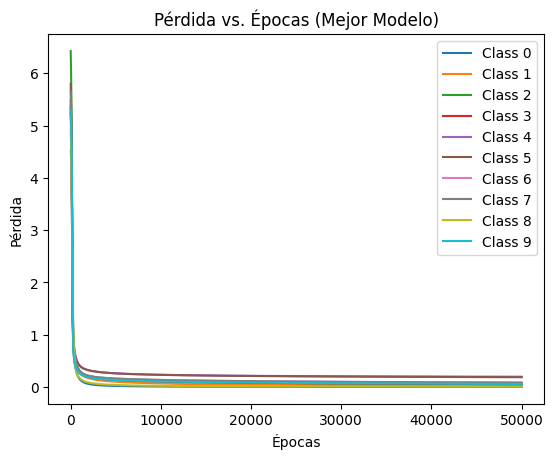

Mejor resultado:
   Precision    Recall  F1-Score  Accuracy  Epochs  Learning Rate  Num Folds
0    0.46631  0.508333  0.481803       0.5   50000           0.01         10


In [269]:
# Especifica tus hiperparámetros
num_classes = 10
epochs = 50000
alpha = 0.01
num_folds = 10  # Cambia el número de folds según tus necesidades

# Realiza la validación cruzada y muestra solo el mejor gráfico junto con los mejores resultados
best_precision, best_recall, best_f1, best_accuracy, best_weights = kfold_cross_validation(X_train, Y_train, num_classes, epochs, alpha, num_folds)

# Especifica tus hiperparámetros en un diccionario
hyperparameters = {'Epochs': epochs, 'Learning Rate': alpha, 'Num Folds': num_folds}

# Muestra los mejores resultados junto con los hiperparámetros
results = pd.DataFrame({
    'Precision': [best_precision],
    'Recall': [best_recall],
    'F1-Score': [best_f1],
    'Accuracy': [best_accuracy],
    **hyperparameters  # Agrega aquí tus hiperparámetros
})

print("Mejor resultado:")
print(results)